# Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset

In [2]:
df_stock = pd.read_csv('ETH-USD.csv')
df_stock.head()

,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA
0,2017-11-09,2017,11,9,Thursday,45,2017-45,308.64,329.45,307.06,320.88,893249984,320.88,0.000000,320.880000,320.880000
1,2017-11-10,2017,11,10,Friday,45,2017-45,320.67,324.72,294.54,299.25,885985984,299.25,-0.067411,310.065000,310.065000
2,2017-11-11,2017,11,11,Saturday,45,2017-45,298.59,319.45,298.19,314.68,842300992,314.68,0.051555,311.603333,311.603333
3,2017-11-12,2017,11,12,Sunday,46,2017-46,314.69,319.15,298.51,307.91,1613479936,307.91,-0.021523,310.680000,310.680000
4,2017-11-13,2017,11,13,Monday,46,2017-46,307.02,328.42,307.02,316.72,1041889984,316.72,0.028606,311.888000,311.888000


In [4]:
df_weekly = pd.read_csv('ETH-USD_weekly_return_volatility.csv')
df_weekly.tail()

,Year,Week_Number,mean_return,volatility,label
216,2021,48,0.153429,4.160537,red
217,2021,49,-0.030571,4.581401,red
218,2021,50,-0.339000,4.784117,green
219,2021,51,0.484143,1.755330,red
220,2021,52,-1.708667,2.985718,red


# Train Decision Tree Classifier on Year 1 (2020)

In [5]:
def random_forest_classifier(N, d):
  return RandomForestClassifier(n_estimators = N, max_depth = d, 
                               criterion = 'entropy',
                                random_state=42)

In [6]:
df_2020 = df_weekly[df_weekly.Year == 2020]
X = df_2020[['mean_return', 'volatility']]
Label = df_2020['label'].values

df_2021 = df_weekly[df_weekly.Year == 2021]
X_test, y_test = df_2021[['mean_return', 'volatility']], df_2021['label']

estimators = [i for i in range(1, 11)]
depth = [i for i in range (1, 6)]
errors = []
N = []
dp = []

min_error, best_n, best_d = float('inf'), 0, 0

for n in estimators:
  for d in depth:
    model = random_forest_classifier(n, d)
    model.fit(X, Label)
    y_pred = model.predict(X_test)
    error_rate = 1 - accuracy_score(y_test, y_pred)
    N.append(n)
    dp.append(d)
    errors.append(error_rate)
    if error_rate < min_error:
      min_error = error_rate
      best_n = n
      best_d = d

print(f"The best n and d are {best_n} and {best_d} with error of {min_error}.")

The best n and d are 3 and 4 with error of 0.37735849056603776.


# Plot the error rate

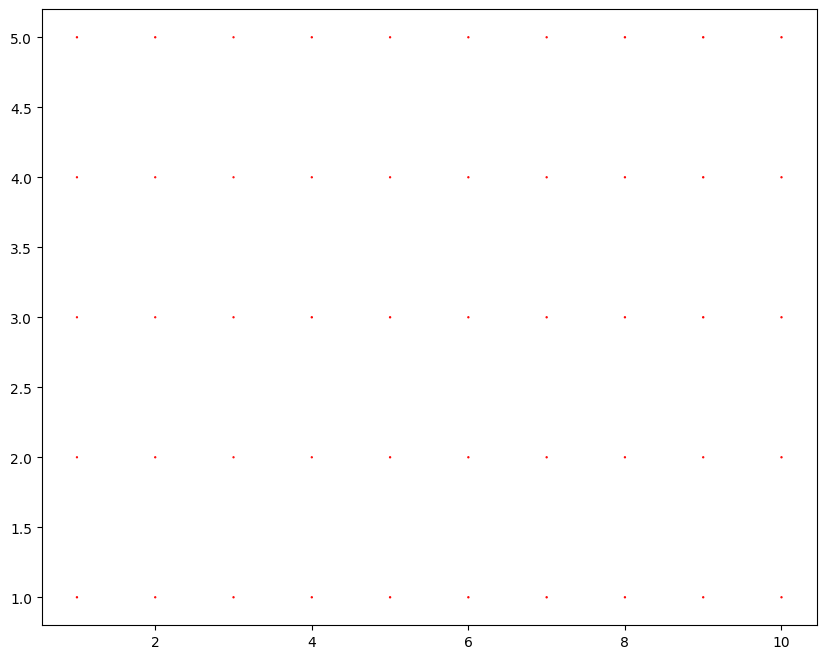

In [7]:
plt.figure(figsize=(10, 8))
plt.scatter(N, dp, s=errors, label="Error Rates", alpha=1, c='red')

# Confusion Matrix

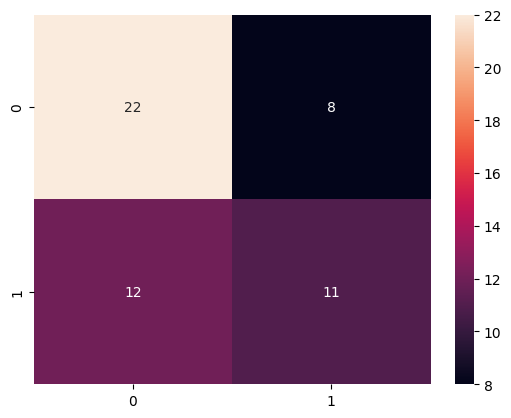

In [8]:
model = random_forest_classifier(3, 4)
model.fit(X, Label)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

# TPR and TNR

In [9]:
tn, fp, fn, tp = cm.ravel()
TPR = tp / (tp + tn)
TNR = tn / (fn + tn)
print(f"TPR = {TPR} and TNR = {TNR}.")

TPR = 0.3333333333333333 and TNR = 0.6470588235294118.
